In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import sys
import warnings

warnings.simplefilter("ignore")

In [6]:
# loading the data to training data
df_train= pd.read_csv('/Users/karan/Desktop/Stirling University/Studies/Semester 3/Dissertation/Work/Python_Codes/Final Code and Data/v5_20220717_172210_296_TRAIN.csv',header=0,delimiter=",")

# loading the data for final test validation on the trained and tuned model
df_validation= pd.read_csv('/Users/karan/Desktop/Stirling University/Studies/Semester 3/Dissertation/Work/Python_Codes/Final Code and Data/v5_20220717_174240_71s_TESTING_1.csv',header=0,delimiter=",")

In [194]:
df_train.head()

,Timestamp,accelX(g),accelY(g),accelZ(g),accelUserX(g),accelUserY(g),accelUserZ(g),gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),...,Speed(m/s),TrueHeading,Alt(m),HorizontalAccuracy(m),VerticalAccuracy(m),Course,ActivityType,ActivityConfidence,RelativeAltitude(meters),Output
0,17-Jul-2022 17:22:10.486,-0.0815,-0.9713,-0.0387,-0.0248,-0.0012,-0.0498,0.0396,0.0350,0.0022,...,8.2011,267.2,19.752193,4.7,3.4,266.5,Automotive,High,-5.9558,0
1,17-Jul-2022 17:22:10.585,-0.0397,-0.9610,-0.0998,0.0680,-0.0074,-0.0080,0.1432,0.0176,-0.0292,...,8.2011,267.2,19.752193,4.7,3.4,266.5,Automotive,High,-5.9558,0
2,17-Jul-2022 17:22:10.685,-0.0156,-0.9120,-0.1703,-0.1116,0.0333,-0.0833,0.1014,0.0240,0.0020,...,8.2011,267.2,19.752193,4.7,3.4,266.5,Automotive,High,-5.9558,0
3,17-Jul-2022 17:22:10.785,-0.0033,-0.8971,-0.1559,-0.0313,0.1043,-0.0737,0.0635,-0.0326,0.0181,...,8.2011,267.2,19.752193,4.7,3.4,266.5,Automotive,High,-5.9558,0
4,17-Jul-2022 17:22:10.885,0.0348,-0.9911,-0.1461,0.0245,-0.0018,-0.0416,-0.0165,0.0218,-0.0078,...,8.2011,267.2,19.752193,4.7,3.4,266.5,Automotive,High,-5.9558,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2971 entries, 0 to 2970
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 2971 non-null   object 
 1   accelX(g)                 2971 non-null   float64
 2   accelY(g)                 2971 non-null   float64
 3   accelZ(g)                 2971 non-null   float64
 4   accelUserX(g)             2971 non-null   float64
 5   accelUserY(g)             2971 non-null   float64
 6   accelUserZ(g)             2971 non-null   float64
 7   gyroX(rad/s)              2971 non-null   float64
 8   gyroY(rad/s)              2971 non-null   float64
 9   gyroZ(rad/s)              2971 non-null   float64
 10  Roll(rads)                2971 non-null   float64
 11  Pitch(rads)               2971 non-null   float64
 12  Yaw(rads)                 2971 non-null   float64
 13  m11                       2971 non-null   float64
 14  m12     

In [8]:
df_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,2971,2971,17-Jul-2022 17:24:32.089,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accelX(g),2971.0,NaN,NaN,NaN,0.007147,0.156277,-0.7816,-0.0675,0.0193,0.09745,0.8197
accelY(g),2971.0,NaN,NaN,NaN,-0.996211,0.165104,-2.6709,-1.08735,-1.0015,-0.91775,0.1484
accelZ(g),2971.0,NaN,NaN,NaN,-0.080065,0.151055,-1.5465,-0.15645,-0.0885,-0.01175,1.9072
accelUserX(g),2971.0,NaN,NaN,NaN,-0.016446,0.15082,-0.8368,-0.08935,-0.0079,0.068,0.6977
accelUserY(g),2971.0,NaN,NaN,NaN,-0.000757,0.16716,-1.791,-0.0896,-0.0066,0.07715,1.1074
accelUserZ(g),2971.0,NaN,NaN,NaN,-0.020458,0.136246,-1.4387,-0.08965,-0.0238,0.04855,1.4852
gyroX(rad/s),2971.0,NaN,NaN,NaN,0.00795,0.282212,-3.1236,-0.1109,0.0019,0.1223,7.291
gyroY(rad/s),2971.0,NaN,NaN,NaN,-0.032313,0.220519,-1.0189,-0.1037,-0.0148,0.0748,1.7943
gyroZ(rad/s),2971.0,NaN,NaN,NaN,-0.000349,0.053283,-0.8941,-0.02265,0.0007,0.0232,0.9267


In [9]:
numerical_columns_train = df_train.select_dtypes(include=[np.number]).columns
numerical_columns_train

Index(['accelX(g)', 'accelY(g)', 'accelZ(g)', 'accelUserX(g)', 'accelUserY(g)',
       'accelUserZ(g)', 'gyroX(rad/s)', 'gyroY(rad/s)', 'gyroZ(rad/s)',
       'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)', 'm11', 'm12', 'm13', 'm21',
       'm22', 'm23', 'm31', 'm32', 'm33', 'qX', 'qY', 'qZ', 'qW', 'Lat',
       'Long', 'Speed(m/s)', 'TrueHeading', 'Alt(m)', 'HorizontalAccuracy(m)',
       'VerticalAccuracy(m)', 'Course', 'RelativeAltitude(meters)', 'Output'],
      dtype='object')

In [193]:
df_train.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
accelX(g),2971.0,0.007147,1.562770e-01,-0.781600,-0.067500,0.019300,0.097450,0.819700
accelY(g),2971.0,-0.996211,1.651039e-01,-2.670900,-1.087350,-1.001500,-0.917750,0.148400
accelZ(g),2971.0,-0.080065,1.510548e-01,-1.546500,-0.156450,-0.088500,-0.011750,1.907200
accelUserX(g),2971.0,-0.016446,1.508195e-01,-0.836800,-0.089350,-0.007900,0.068000,0.697700
accelUserY(g),2971.0,-0.000757,1.671599e-01,-1.791000,-0.089600,-0.006600,0.077150,1.107400
accelUserZ(g),2971.0,-0.020458,1.362460e-01,-1.438700,-0.089650,-0.023800,0.048550,1.485200
gyroX(rad/s),2971.0,0.007950,2.822123e-01,-3.123600,-0.110900,0.001900,0.122300,7.291000
gyroY(rad/s),2971.0,-0.032313,2.205195e-01,-1.018900,-0.103700,-0.014800,0.074800,1.794300
gyroZ(rad/s),2971.0,-0.000349,5.328254e-02,-0.894100,-0.022650,0.000700,0.023200,0.926700
Roll(rads),2971.0,0.342225,8.861765e-01,-3.114200,-0.037200,0.402700,0.830750,3.116800


Percentage of potholes samples 6.024907438572871 %
Percentage of not potholes samples 93.97509256142713 %


<AxesSubplot:>

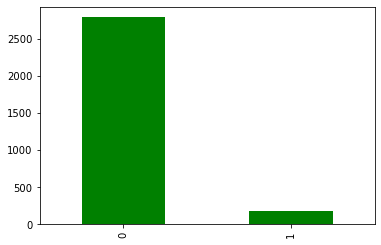

In [191]:
potholes_train = df_train[df_train['Output'] == 1]
not_potholes_train = df_train[df_train['Output'] == 0]

print("Percentage of potholes samples", 1.*len(potholes_train)/len(df_train)*100.0, "%")
print("Percentage of not potholes samples", 1.*len(not_potholes_train)/len(df_train)*100.0, "%")

df_train['Output'].value_counts().plot(kind='bar', color='g')

array([[<AxesSubplot:title={'center':'accelX(g)'}>,
        <AxesSubplot:title={'center':'accelY(g)'}>,
        <AxesSubplot:title={'center':'accelZ(g)'}>,
        <AxesSubplot:title={'center':'accelUserX(g)'}>,
        <AxesSubplot:title={'center':'accelUserY(g)'}>,
        <AxesSubplot:title={'center':'accelUserZ(g)'}>],
       [<AxesSubplot:title={'center':'gyroX(rad/s)'}>,
        <AxesSubplot:title={'center':'gyroY(rad/s)'}>,
        <AxesSubplot:title={'center':'gyroZ(rad/s)'}>,
        <AxesSubplot:title={'center':'Roll(rads)'}>,
        <AxesSubplot:title={'center':'Pitch(rads)'}>,
        <AxesSubplot:title={'center':'Yaw(rads)'}>],
       [<AxesSubplot:title={'center':'m11'}>,
        <AxesSubplot:title={'center':'m12'}>,
        <AxesSubplot:title={'center':'m13'}>,
        <AxesSubplot:title={'center':'m21'}>,
        <AxesSubplot:title={'center':'m22'}>,
        <AxesSubplot:title={'center':'m23'}>],
       [<AxesSubplot:title={'center':'m31'}>,
        <AxesSubplot:title=

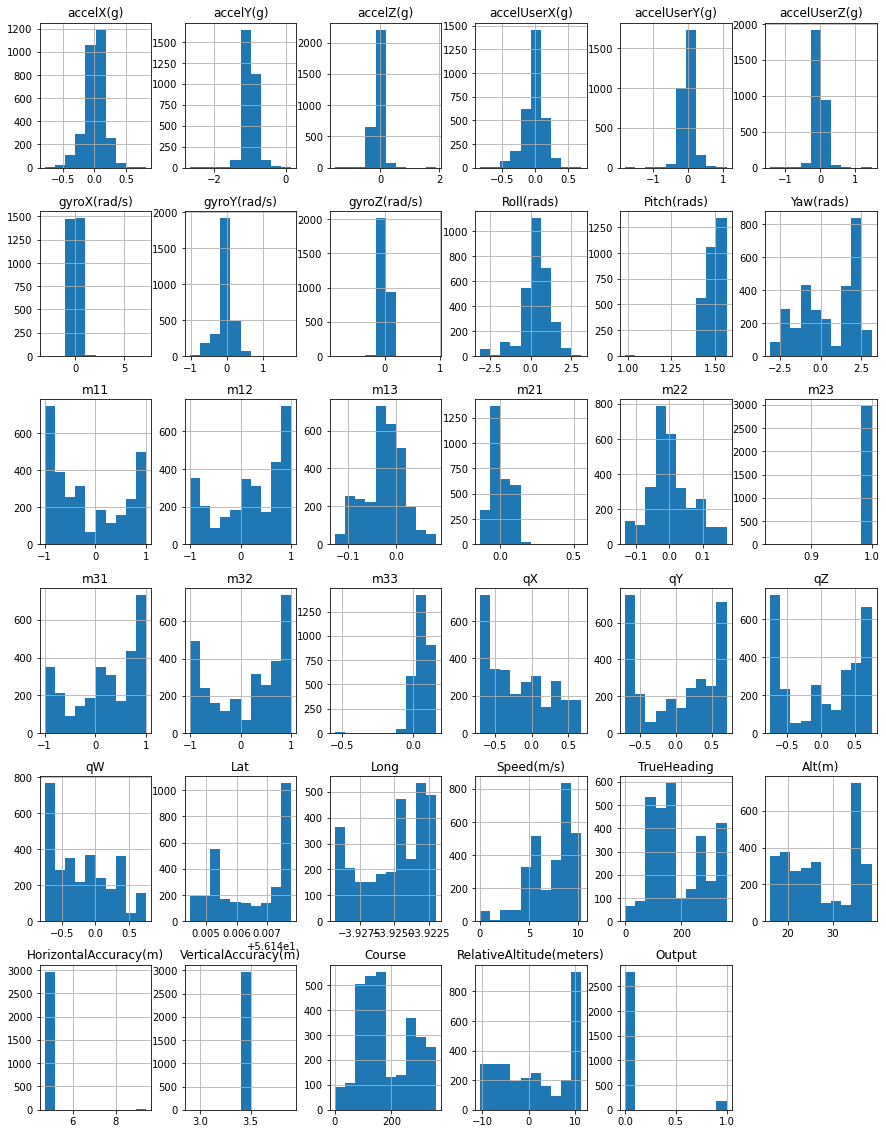

In [10]:
# Plot distributions...
df_train.hist(figsize = (15,20))

In [11]:
df_validation.head()

,Timestamp,accelX(g),accelY(g),accelZ(g),accelUserX(g),accelUserY(g),accelUserZ(g),gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),...,Speed(m/s),TrueHeading,Alt(m),HorizontalAccuracy(m),VerticalAccuracy(m),Course,ActivityType,ActivityConfidence,RelativeAltitude(meters),Output
0,17-Jul-2022 17:42:40.987,0.0483,-0.9927,-0.0465,0.0448,0.0722,-0.0301,0.1518,-0.0086,0.0290,...,7.9422,299.2,12.975561,4.7,3.4,294.4,Automotive,High,2.5102,0
1,17-Jul-2022 17:42:41.087,-0.0176,-1.0569,-0.0621,-0.0410,-0.0629,-0.0570,-0.0066,-0.0403,0.0305,...,7.1239,299.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0
2,17-Jul-2022 17:42:41.187,0.0264,-1.0705,-0.1192,0.0088,-0.0800,-0.1104,-0.0030,-0.0422,0.0219,...,7.1239,299.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0
3,17-Jul-2022 17:42:41.286,0.0171,-1.0115,-0.0205,0.0009,-0.0109,0.0167,-0.0051,-0.0299,-0.0091,...,7.1239,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0
4,17-Jul-2022 17:42:41.386,-0.0289,-0.9831,-0.0254,-0.0711,-0.0115,0.0223,0.2552,-0.2027,0.0434,...,7.1239,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0


In [12]:
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 713 non-null    object 
 1   accelX(g)                 713 non-null    float64
 2   accelY(g)                 713 non-null    float64
 3   accelZ(g)                 713 non-null    float64
 4   accelUserX(g)             713 non-null    float64
 5   accelUserY(g)             713 non-null    float64
 6   accelUserZ(g)             713 non-null    float64
 7   gyroX(rad/s)              713 non-null    float64
 8   gyroY(rad/s)              713 non-null    float64
 9   gyroZ(rad/s)              713 non-null    float64
 10  Roll(rads)                713 non-null    float64
 11  Pitch(rads)               713 non-null    float64
 12  Yaw(rads)                 713 non-null    float64
 13  m11                       713 non-null    float64
 14  m12       

In [13]:
df_test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,713,712,17-Jul-2022 17:42:45.086,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accelX(g),713.0,NaN,NaN,NaN,0.043179,0.137785,-0.6484,-0.027,0.0391,0.1096,0.7227
accelY(g),713.0,NaN,NaN,NaN,-0.995409,0.138011,-1.5381,-1.0724,-0.9981,-0.9197,-0.5438
accelZ(g),713.0,NaN,NaN,NaN,-0.033476,0.097917,-0.4554,-0.0861,-0.0289,0.0213,0.2959
accelUserX(g),713.0,NaN,NaN,NaN,0.015661,0.134666,-0.6902,-0.0563,0.0117,0.0818,0.6369
accelUserY(g),713.0,NaN,NaN,NaN,0.004389,0.135487,-0.4024,-0.0733,0.0009,0.0798,0.4364
accelUserZ(g),713.0,NaN,NaN,NaN,-0.021345,0.100858,-0.4491,-0.0739,-0.0165,0.0378,0.3349
gyroX(rad/s),713.0,NaN,NaN,NaN,0.015768,0.205734,-0.5932,-0.1003,0.0033,0.125,0.9896
gyroY(rad/s),713.0,NaN,NaN,NaN,0.049068,0.224606,-0.5715,-0.0553,0.0124,0.0975,0.896
gyroZ(rad/s),713.0,NaN,NaN,NaN,0.003475,0.050457,-0.4404,-0.0201,0.0036,0.0275,0.2433


In [14]:
numerical_columns_test = df_validation.select_dtypes(include=[np.number]).columns
numerical_columns_test

Index(['accelX(g)', 'accelY(g)', 'accelZ(g)', 'accelUserX(g)', 'accelUserY(g)',
       'accelUserZ(g)', 'gyroX(rad/s)', 'gyroY(rad/s)', 'gyroZ(rad/s)',
       'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)', 'm11', 'm12', 'm13', 'm21',
       'm22', 'm23', 'm31', 'm32', 'm33', 'qX', 'qY', 'qZ', 'qW', 'Lat',
       'Long', 'Speed(m/s)', 'TrueHeading', 'Alt(m)', 'HorizontalAccuracy(m)',
       'VerticalAccuracy(m)', 'Course', 'RelativeAltitude(meters)', 'Output'],
      dtype='object')

array([[<AxesSubplot:title={'center':'accelX(g)'}>,
        <AxesSubplot:title={'center':'accelY(g)'}>,
        <AxesSubplot:title={'center':'accelZ(g)'}>,
        <AxesSubplot:title={'center':'accelUserX(g)'}>,
        <AxesSubplot:title={'center':'accelUserY(g)'}>,
        <AxesSubplot:title={'center':'accelUserZ(g)'}>],
       [<AxesSubplot:title={'center':'gyroX(rad/s)'}>,
        <AxesSubplot:title={'center':'gyroY(rad/s)'}>,
        <AxesSubplot:title={'center':'gyroZ(rad/s)'}>,
        <AxesSubplot:title={'center':'Roll(rads)'}>,
        <AxesSubplot:title={'center':'Pitch(rads)'}>,
        <AxesSubplot:title={'center':'Yaw(rads)'}>],
       [<AxesSubplot:title={'center':'m11'}>,
        <AxesSubplot:title={'center':'m12'}>,
        <AxesSubplot:title={'center':'m13'}>,
        <AxesSubplot:title={'center':'m21'}>,
        <AxesSubplot:title={'center':'m22'}>,
        <AxesSubplot:title={'center':'m23'}>],
       [<AxesSubplot:title={'center':'m31'}>,
        <AxesSubplot:title=

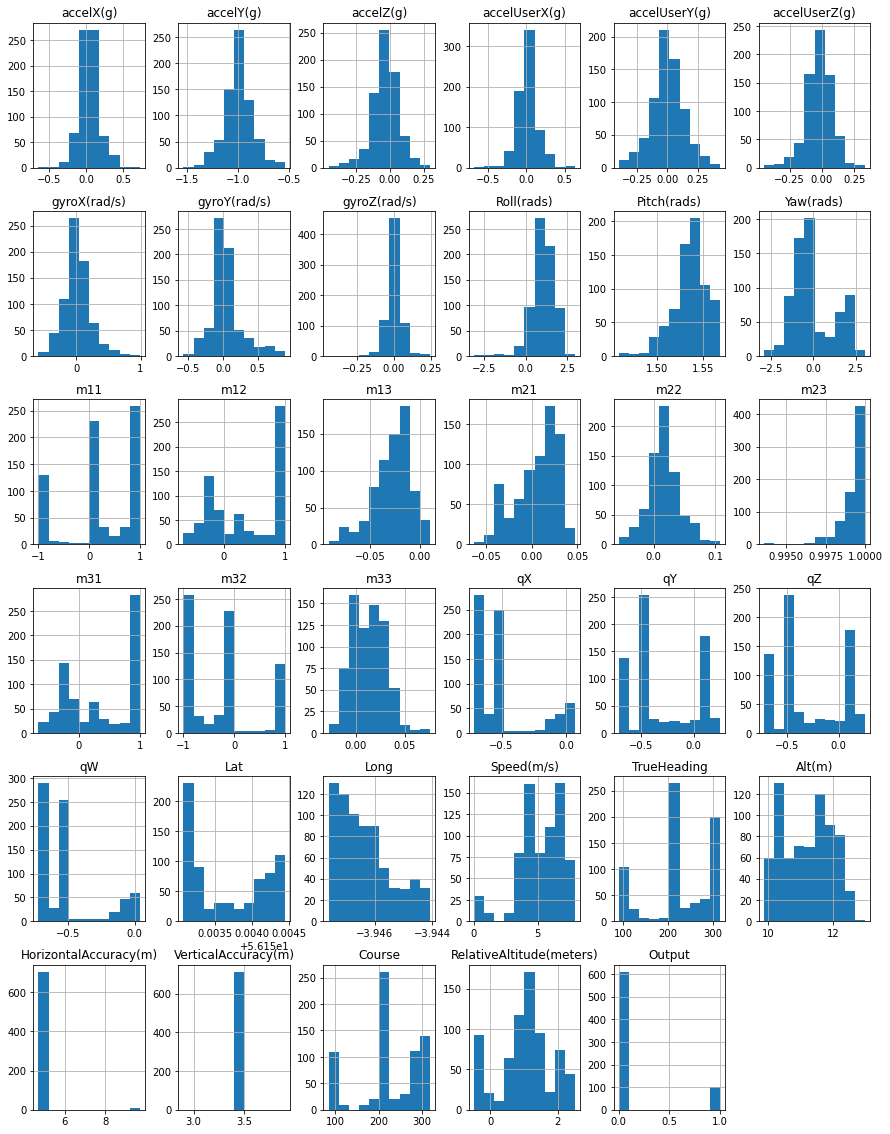

In [15]:
# Plot distributions...
df_validation.hist(figsize = (15,20))

# Data Prepration

Preparing the validation dataset first and then processing training data

In [23]:
df_train_copy = df_train.copy()

In [27]:
X = df_train_copy.drop(['Timestamp', 'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)', 'm11', 'm12', 'm13', 'm21',
       'm22', 'm23', 'm31', 'm32', 'm33', 'qX', 'qY', 'qZ', 'qW', 'Lat',
       'Long', 'TrueHeading', 'Alt(m)', 'HorizontalAccuracy(m)','VerticalAccuracy(m)', 'Course', 'ActivityType', 'ActivityConfidence', 'RelativeAltitude(meters)', 'Output'],axis=1)
Y= pd.DataFrame(pd.Series(df_train_copy['Output'], dtype="category"))

doing a stratified split to keep the ratio of Ys as same in both training and testing data

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=.8, stratify=Y)

In [35]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

2376
2376
595
595


In [36]:
!pip install imblearn

In [37]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE(random_state=0)
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [38]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)

y_train = pd.DataFrame(y_train, columns=['Output'])

In [39]:
y_train
# type(y_train)

,Output
0,0
1,0
2,0
3,0
4,0
...,...
4461,1
4462,1
4463,1
4464,1


In [195]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   accelX(g)      4466 non-null   float64
 1   accelY(g)      4466 non-null   float64
 2   accelZ(g)      4466 non-null   float64
 3   accelUserX(g)  4466 non-null   float64
 4   accelUserY(g)  4466 non-null   float64
 5   accelUserZ(g)  4466 non-null   float64
 6   gyroX(rad/s)   4466 non-null   float64
 7   gyroY(rad/s)   4466 non-null   float64
 8   gyroZ(rad/s)   4466 non-null   float64
 9   Speed(m/s)     4466 non-null   float64
dtypes: float64(10)
memory usage: 349.0 KB


Percentage of potholes samples 50.0 %
Percentage of not potholes samples 50.0 %


<AxesSubplot:>

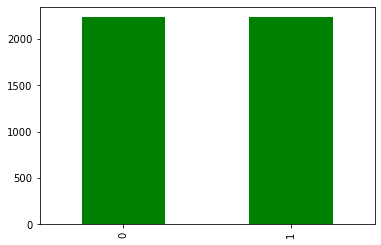

In [196]:
potholes_train_oversample = y_train[y_train['Output'] == 1]
not_potholes_train_oversample = y_train[y_train['Output'] == 0]

print("Percentage of potholes samples", 1.*len(potholes_train_oversample)/len(y_train)*100.0, "%")
print("Percentage of not potholes samples", 1.*len(not_potholes_train_oversample)/len(y_train)*100.0, "%")

y_train['Output'].value_counts().plot(kind='bar', color='g')

In [170]:
df_val_copy=df_validation.copy()

In [171]:
x_val = df_val_copy.drop(['Timestamp', 'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)', 'm11', 'm12', 'm13', 'm21',
       'm22', 'm23', 'm31', 'm32', 'm33', 'qX', 'qY', 'qZ', 'qW', 'Lat',
       'Long', 'TrueHeading', 'Alt(m)', 'HorizontalAccuracy(m)','VerticalAccuracy(m)', 'Course','ActivityType', 'ActivityConfidence', 'RelativeAltitude(meters)', 'Output'],axis=1)
y_val = pd.DataFrame(pd.Series(df_val_copy['Output'], dtype="category"))

In [172]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_val = lab.fit_transform(y_val)

y_val = pd.DataFrame(y_val,columns=['Output'])

In [173]:
y_val.columns

Index(['Output'], dtype='object')

In [174]:
x_val.columns

Index(['accelX(g)', 'accelY(g)', 'accelZ(g)', 'accelUserX(g)', 'accelUserY(g)',
       'accelUserZ(g)', 'gyroX(rad/s)', 'gyroY(rad/s)', 'gyroZ(rad/s)',
       'Speed(m/s)'],
      dtype='object')

# Training the Models

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score,f1_score, precision_score


In [45]:

models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
# rf2 = RandomForestClassifier(n_estimators=10000, criterion='entropy',
#                                 max_depth=20, random_state=0)
# models.append(("RandomForest2",rf2))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))

# testing the accuracy of models

In [47]:
results_accuracy = []
names_accuracy = []
for name,model in models:
    result = cross_val_score(model, x_train, y_train,  cv=10)
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    score = accuracy_score(y_test, ypred)
    print(name,':-')
    print('\t cross_val Accuracy',result.mean())
    print('\t Testing Accuracy',score)
    names_accuracy.append(name)
    results_accuracy.append(result)

LogisticRegression :-
	 cross_val recall score 0.720787813123865
	 Testing recall score 0.7411764705882353
SVC :-
	 cross_val recall score 0.716754446684925
	 Testing recall score 0.7210084033613445
LinearSVC :-
	 cross_val recall score 0.7189981039516056
	 Testing recall score 0.7344537815126051
KNeighbors :-
	 cross_val recall score 0.9390992265326391
	 Testing recall score 0.8504201680672269
DecisionTree :-
	 cross_val recall score 0.9041647856662755
	 Testing recall score 0.8705882352941177
RandomForest :-
	 cross_val recall score 0.9529810094200499
	 Testing recall score 0.9109243697478991
MLPClassifier :-
	 cross_val recall score 0.7754165788866484
	 Testing recall score 0.7394957983193278


# testing the recall score of the models

In [48]:
results_recall = []
names_recall = []
for name,model in models:
    result = cross_val_score(model, x_train, y_train,  cv=10)
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    score = recall_score(y_test, ypred)
    print(name,':-')
    print('\t cross_val accuracy',result.mean())
    print('\t Testing recall score',score)
    names_recall.append(name)
    results_recall.append(result)

LogisticRegression :-
	 cross_val recall score 0.720787813123865
	 Testing recall score 0.5
SVC :-
	 cross_val recall score 0.716754446684925
	 Testing recall score 0.5555555555555556
LinearSVC :-
	 cross_val recall score 0.7185496734583321
	 Testing recall score 0.5
KNeighbors :-
	 cross_val recall score 0.9390992265326391
	 Testing recall score 0.6111111111111112
DecisionTree :-
	 cross_val recall score 0.9059575044391609
	 Testing recall score 0.3888888888888889
RandomForest :-
	 cross_val recall score 0.9532062278668955
	 Testing recall score 0.4166666666666667
MLPClassifier :-
	 cross_val recall score 0.7754165788866484
	 Testing recall score 0.6111111111111112


# Hyperparameter tuning of some models to get better accuracy and recall scores

the accuracy of KNN, Decision Tree and Random forest is higher than other models but we are more concerned about recall, so we are going to tune the HP for some models which give good recall and accuracy combination. we will be doing it for
1. Random Forest
2. KNN
3. Logistic Regression
4. MLP

In [92]:
from sklearn.model_selection import RandomizedSearchCV

# KNN: HP tuning and testing

Classification report of **UN-TUNED** KNN Model

In [203]:
knnUntuned=KNeighborsClassifier()
knnUntuned.fit(x_train,y_train)
ypredTestUntunedKnn=knnUntuned.predict(x_test)

In [204]:
cfrKnnTestUntuned=classification_report(y_test,ypredTestUntunedKnn)
print("classificaiton report of UN-tuned KNN on test data is")
print(cfrKnnTestUntuned)

classificaiton report of UN-tuned KNN on test data is
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       559
           1       0.23      0.61      0.33        36

    accuracy                           0.85       595
   macro avg       0.60      0.74      0.62       595
weighted avg       0.93      0.85      0.88       595



Finding the best hyperparameters for KNN using RandomsearchCV

In [185]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
weights=['uniform','distance']
metric=['minkowski','euclidean','manhattan']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p,weights=weights,metric=metric,algorithm=algorithm)
#Create new KNN object
knn = KNeighborsClassifier()
#Use GridSearch
knnRs = RandomizedSearchCV(knn, hyperparameters, cv=10)
#Fit the model
knnRs.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [186]:
bestModelKnn = knnRs.best_estimator_
print(bestModelKnn)
print(knnRs.best_score_)
print(knnRs.best_params_)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=43, metric='euclidean',
                     n_neighbors=2)
0.9648483662884603
{'weights': 'uniform', 'p': 2, 'n_neighbors': 2, 'metric': 'euclidean', 'leaf_size': 43, 'algorithm': 'kd_tree'}


Training Using Tuned model and getting the classification report of test data from **TUNED** model

In [201]:
tunedKnn=KNeighborsClassifier(algorithm='kd_tree', leaf_size=43, metric='euclidean',n_neighbors=2)
tunedKnn.fit(x_train,y_train)
yPredTestTunedKnn=tunedKnn.predict(x_test)

In [205]:
cfrKnnTestTuned=classification_report(y_test,yPredTestTunedKnn)
print("classificaiton report of Tuned KNN on test data")
print(cfrKnnTestTuned)

classificaiton report of Tuned KNN on test data
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       559
           1       0.33      0.42      0.37        36

    accuracy                           0.91       595
   macro avg       0.65      0.68      0.66       595
weighted avg       0.92      0.91      0.92       595



# KNN tuned model validation on unseen data

In [206]:
yPredValidationTunedKnn=tunedKnn.predict(x_val)
cfrKnnValTuned=classification_report(y_val,yPredValidationTunedKnn)
print(cfrKnnValTuned)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       611
           1       0.26      0.17      0.20       102

    accuracy                           0.81       713
   macro avg       0.57      0.54      0.55       713
weighted avg       0.78      0.81      0.80       713



# Random Forest: HP tuning and testing

Classification Report of **UN-Tuned** random forest on test data

In [207]:
rfUntuned=RandomForestClassifier()
rfUntuned.fit(x_train,y_train)
ypredTestUntunedRf=rfUntuned.predict(x_test)

In [208]:
cfrRfTestUntuned=classification_report(y_test,ypredTestUntunedRf)
print("classificaiton report of UN-tuned Random Forest on test data is")
print(cfrRfTestUntuned)

classificaiton report of UN-tuned Random Forest on test data is
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       559
           1       0.33      0.39      0.35        36

    accuracy                           0.91       595
   macro avg       0.64      0.67      0.65       595
weighted avg       0.92      0.91      0.92       595



Hyperparameter tuning of Random forest

In [107]:
#RandomForestClassifier
rf = RandomForestClassifier()

param_grid_rf = {'n_estimators':[50, 100, 200, 300, 500, 1000],
                 'criterion':["gini","entropy","log_loss"],'max_depth':[20,50,100,None]}

rfRs = RandomizedSearchCV(rf, param_distributions=param_grid_rf,cv=10, random_state=0)

rfRs.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [20, 50, 100, None],
                                        'n_estimators': [50, 100, 200, 300, 500,
                                                         1000]},
                   random_state=0)

In [108]:
bestModel = rfRs.best_estimator_
print(bestModel)
print(rfRs.best_score_)
print(rfRs.best_params_)

RandomForestClassifier(criterion='log_loss', max_depth=20, n_estimators=300)
0.9527557909732046
{'n_estimators': 300, 'max_depth': 20, 'criterion': 'log_loss'}


Classification Report of **Tuned** random forest on test data

In [212]:
tunedRf=RandomForestClassifier(criterion='log_loss', max_depth=20, n_estimators=300)
tunedRf.fit(x_train,y_train)
yPredTestTunedRf=tunedRf.predict(x_test)

In [216]:
cfrRfTestTuned=classification_report(y_test,yPredTestTunedRf)
print("classificaiton report of Tuned Random Forest on test data is")
print(cfrRfTestTuned)

classificaiton report of Tuned Random Forest on test data is
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       559
           1       0.36      0.47      0.41        36

    accuracy                           0.92       595
   macro avg       0.66      0.71      0.68       595
weighted avg       0.93      0.92      0.92       595



# Random Forest tuned model validation on unseen data

In [229]:
yPredValidationTunedRf_val=tunedRf.predict(x_val)
cfrRfValTuned=classification_report(y_val,yPredValidationTunedRf_val)
print("classificaiton report of Tuned Random Forest on validation data is")
print(cfrRfValTuned)

classificaiton report of Tuned Random Forest on validation data is
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       611
           1       0.45      0.25      0.32       102

    accuracy                           0.85       713
   macro avg       0.67      0.60      0.62       713
weighted avg       0.82      0.85      0.83       713



# Logistic Regression: HP tuning and testing

In [218]:
lRUntuned=LogisticRegression()
lRUntuned.fit(x_train,y_train)
ypredTestUntunedLr=lRUntuned.predict(x_test)

In [219]:
cfrLrTestUntuned=classification_report(y_test,ypredTestUntunedLr)
print("classificaiton report of UN-tuned Logistic Regression on test data is")
print(cfrLrTestUntuned)

classificaiton report of UN-tuned Logistic Regression on test data is
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       559
           1       0.12      0.50      0.19        36

    accuracy                           0.74       595
   macro avg       0.54      0.63      0.52       595
weighted avg       0.91      0.74      0.81       595



Hyperparameter tuning for Logistic Regression

In [155]:
lr = LogisticRegression()

param_grid_lr = { 

    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

lrRs = RandomizedSearchCV(lr, param_distributions=param_grid_lr, cv=15,random_state=0)

lrRs.fit(x_train,y_train)

RandomizedSearchCV(cv=15, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=0)

In [220]:
lr_bestModel = lrRs.best_estimator_
print(lr_bestModel)
print(lrRs.best_score_)
print(lrRs.best_params_)

LogisticRegression(C=0.1, penalty='none', solver='saga')
0.7203360977410193
{'solver': 'saga', 'penalty': 'none', 'C': 0.1}


Classification Report of **Tuned** Logistic Regression on test data

In [222]:
tunedLr=LogisticRegression(C=0.1, penalty='none', solver='saga')
tunedLr.fit(x_train,y_train)
yPredTestTunedLr=tunedLr.predict(x_test)

In [223]:
cfrLrTestTuned=classification_report(y_test,yPredTestTunedLr)
print("classificaiton report of Tuned Logistic Regression on test data is")
print(cfrLrTestTuned)

classificaiton report of Tuned Logistic Regression on test data is
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       559
           1       0.11      0.50      0.18        36

    accuracy                           0.73       595
   macro avg       0.54      0.62      0.51       595
weighted avg       0.91      0.73      0.80       595



# Logistic Regression tuned model validation on unseen data

In [230]:
yPredValidationTunedLr=tunedLr.predict(x_val)
cfrLrValTuned=classification_report(y_val,yPredValidationTunedLr)
print("classificaiton report of Tuned Logistic Regression on validation data is")
print(cfrLrValTuned)

classificaiton report of Tuned Logistic Regression on validation data is
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       611
           1       0.21      0.37      0.27       102

    accuracy                           0.71       713
   macro avg       0.55      0.57      0.55       713
weighted avg       0.78      0.71      0.74       713



# MLP: HP tuning and testing

In [226]:
mlpUntuned=MLPClassifier()
mlpUntuned.fit(x_train,y_train)
ypredTestUntunedMlp=mlpUntuned.predict(x_test)

In [231]:
cfrMlpTestUntuned=classification_report(y_test,ypredTestUntunedMlp)
print("classificaiton report of UN-tuned MLP on test data is")
print(cfrMlpTestUntuned)

classificaiton report of UN-tuned MLP on test data is
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       559
           1       0.16      0.53      0.24        36

    accuracy                           0.80       595
   macro avg       0.56      0.67      0.56       595
weighted avg       0.92      0.80      0.84       595



Hyperparameter tuning for MLP

In [112]:
#MLPClassifier
mlp = MLPClassifier()

param_grid_mlp = {
    'hidden_layer_sizes': [(10,30,10),(20,),(50,100,50)],
    'activation': ['identity','logistic''tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}

mlpRs = RandomizedSearchCV(mlp, param_distributions=param_grid_mlp, cv=10)

mlpRs.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=MLPClassifier(),
                   param_distributions={'activation': ['identity',
                                                       'logistictanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(10, 30, 10),
                                                               (20,),
                                                               (50, 100, 50)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']})

In [113]:
bestModelMlp = mlpRs.best_estimator_
print(bestModelMlp)
print(mlpRs.best_score_)
print(mlpRs.best_params_)

MLPClassifier(hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive')
0.886247629939507
{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.0001, 'activation': 'relu'}


Classification Report of **Tuned** MLP on test data

In [116]:
tunedMlp=MLPClassifier(hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive')
tunedMlp.fit(x_train,y_train)
yPredTestTunedMlp=tunedMlp.predict(x_test)

In [232]:
cfrMlpTestTuned=classification_report(y_test,yPredTestTunedMlp)
print("classificaiton report of Tuned MLP on test data is")
print(cfrMlpTestTuned)

classificaiton report of Tuned MLP on test data is
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       559
           1       0.24      0.36      0.29        36

    accuracy                           0.89       595
   macro avg       0.60      0.64      0.62       595
weighted avg       0.91      0.89      0.90       595



# MLP tuned model validation on unseen data

In [234]:
yPredValidationTunedMlp=tunedMlp.predict(x_val)
cfrMlpValTuned=classification_report(y_val,yPredValidationTunedMlp)
print("classificaiton report of Tuned MLP on Validation data is")
print(cfrMlpValTuned)

classificaiton report of Tuned MLP on Validation data is
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       611
           1       0.40      0.26      0.32       102

    accuracy                           0.84       713
   macro avg       0.64      0.60      0.61       713
weighted avg       0.81      0.84      0.82       713



# save the model after this-- find from sklearn

In [54]:
ypredictions_RF2=RF2.predict(x_test)

In [55]:
score_hp_rf2 = recall_score(y_test, ypredictions_RF2)

In [56]:
print(score_hp_rf2)

0.4444444444444444


# use the saved model in below

In [57]:
print(type(ypredictions_RF2))

<class 'numpy.ndarray'>


In [59]:
print(ypredictions_RF2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [35]:
mylist_RF=[]

for i in ypredictions_RF:
    mylist_RF.append(i)

In [36]:
print(mylist_RF)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 

In [37]:
df_with_RF_predict=df_test.copy()

In [38]:
df_with_RF_predict['Predictions']=pd.Series(mylist_RF)

In [39]:
pd.set_option('display.max_rows', 1000)

In [40]:
df_with_RF_predict

,Timestamp,accelX(g),accelY(g),accelZ(g),accelUserX(g),accelUserY(g),accelUserZ(g),gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),...,TrueHeading,Alt(m),HorizontalAccuracy(m),VerticalAccuracy(m),Course,ActivityType,ActivityConfidence,RelativeAltitude(meters),Output,Predictions
0,17-Jul-2022 17:42:40.987,0.0483,-0.9927,-0.0465,0.0448,0.0722,-0.0301,0.1518,-0.0086,0.0290,...,299.2,12.975561,4.7,3.4,294.4,Automotive,High,2.5102,0,0
1,17-Jul-2022 17:42:41.087,-0.0176,-1.0569,-0.0621,-0.0410,-0.0629,-0.0570,-0.0066,-0.0403,0.0305,...,299.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
2,17-Jul-2022 17:42:41.187,0.0264,-1.0705,-0.1192,0.0088,-0.0800,-0.1104,-0.0030,-0.0422,0.0219,...,299.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
3,17-Jul-2022 17:42:41.286,0.0171,-1.0115,-0.0205,0.0009,-0.0109,0.0167,-0.0051,-0.0299,-0.0091,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
4,17-Jul-2022 17:42:41.386,-0.0289,-0.9831,-0.0254,-0.0711,-0.0115,0.0223,0.2552,-0.2027,0.0434,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
5,17-Jul-2022 17:42:41.486,-0.1075,-1.0606,-0.1074,-0.1074,-0.0576,-0.0429,0.0865,0.0396,0.0009,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
6,17-Jul-2022 17:42:41.585,-0.0227,-1.0403,-0.0319,-0.0334,-0.0402,-0.0192,-0.0337,-0.0057,-0.0048,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
7,17-Jul-2022 17:42:41.685,0.0761,-1.0001,-0.0341,0.0659,0.0274,-0.0164,0.0400,-0.0159,0.0036,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
8,17-Jul-2022 17:42:41.785,-0.0746,-0.9774,-0.0182,-0.1079,0.0071,0.0089,0.1313,-0.1795,0.0244,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
9,17-Jul-2022 17:42:41.884,-0.0997,-1.0155,0.0958,-0.0953,-0.0074,0.1541,-0.0304,0.0187,-0.0091,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0


In [41]:
# print(ypredictions_RF2)

# Logistic Regression

In [ ]:
ypredictions_LR=logreg.predict(x_test)

In [ ]:
print(type(ypredictions_LR))

In [ ]:
print(ypredictions_LR)

In [ ]:
ypredictions_LR.columns

# MLP CLASSIFIER

In [ ]:
MLPC = MLPClassifier(solver='lbfgs', random_state=0)

In [117]:
print(recallScoreTunedMlp)

0.3611111111111111


In [117]:
print(recallScoreTunedMlp)

0.3611111111111111


In [ ]:
mylist=[]
for i in ypredictions_MLP:
  mylist.append(i)

In [ ]:
print(mylist)

In [ ]:
print(type(ypredictions_MLP))

In [ ]:
df_test_copy_new=df_test.copy()

In [ ]:
pd.set_option('display.max_rows', 1000000)

In [ ]:
df_test_copy_new['Predictions_list']=pd.Series(mylist)

In [ ]:
df_test_copy_new

In [ ]:
from sklearn.linear_model import Perceptron
# X, y = load_breast_cancer(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x_train, y_train)

coeffs = clf.coef_

In [ ]:
print(coeffs)

# Evaluation of Model on Unseen data

In [134]:
from sklearn.metrics import classification_report

In [119]:
df_validation_copy = df_validation.copy()

In [124]:
x_valid = df_validation_copy.drop(['Timestamp', 'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)', 'm11', 'm12', 'm13', 'm21',
       'm22', 'm23', 'm31', 'm32', 'm33', 'qX', 'qY', 'qZ', 'qW', 'Lat',
       'Long', 'TrueHeading', 'Alt(m)', 'HorizontalAccuracy(m)','VerticalAccuracy(m)', 'Course','ActivityType', 'ActivityConfidence', 'RelativeAltitude(meters)', 'Output'],axis=1)
y_valid = pd.DataFrame(pd.Series(df_validation_copy['Output'], dtype="category"))


In [125]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_valid = lab.fit_transform(y_valid)

y_valid = pd.DataFrame(y_valid,columns=['Output'])

In [126]:
y_valid.columns

Index(['Output'], dtype='object')

In [127]:
x_valid.columns

Index(['accelX(g)', 'accelY(g)', 'accelZ(g)', 'accelUserX(g)', 'accelUserY(g)',
       'accelUserZ(g)', 'gyroX(rad/s)', 'gyroY(rad/s)', 'gyroZ(rad/s)',
       'Speed(m/s)'],
      dtype='object')

# Evaluation of tuned KNN model

In [188]:
yPredTunedEvaluationKnn=tunedKnn.predict(x_valid)
cfrKnn=classification_report(y_valid,yPredTunedEvaluationKnn)
print(cfrKnn)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       611
           1       0.22      0.14      0.17       102

    accuracy                           0.81       713
   macro avg       0.54      0.53      0.53       713
weighted avg       0.77      0.81      0.79       713



# Evaluation of un-tuned Random Forest model

on test data

In [142]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
ypredRf=rf.predict(x_test)
cfrRfBasic=classification_report(y_test,ypredRf)
print("classificaiton report of untuned random forest")
print(cfrRfBasic)

classificaiton report of untuned random forest
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       559
           1       0.38      0.42      0.39        36

    accuracy                           0.92       595
   macro avg       0.67      0.69      0.68       595
weighted avg       0.93      0.92      0.92       595



On Validation data

In [143]:
ypredRf_1=rf.predict(x_valid)
cfrRfBasic_1=classification_report(y_valid,ypredRf_1)
print("classificaiton report of untuned random forest")
print(cfrRfBasic_1)

classificaiton report of untuned random forest
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       611
           1       0.39      0.21      0.27       102

    accuracy                           0.84       713
   macro avg       0.63      0.58      0.59       713
weighted avg       0.81      0.84      0.82       713



# Evaluation of tuned Random Forest model

In [131]:
yPredTunedEvaluationRf=tunedRf.predict(x_valid)
cfrRf=classification_report(y_valid,yPredTunedEvaluationRf)
print(cfrRf)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       611
           1       0.39      0.22      0.28       102

    accuracy                           0.84       713
   macro avg       0.64      0.58      0.59       713
weighted avg       0.81      0.84      0.82       713



# Evaluation of un-tuned Logistic Regression model

on test data

In [138]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
ypredLr=lr.predict(x_test)
cfrLrBasic=classification_report(y_test,ypredLr)
print("classificaiton report of untuned logistinc regression")
print(cfrLrBasic)

classificaiton report of untuned logistinc regression
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       559
           1       0.12      0.50      0.19        36

    accuracy                           0.74       595
   macro avg       0.54      0.63      0.52       595
weighted avg       0.91      0.74      0.81       595



on validation data

In [144]:
ypredLr_1=lr.predict(x_valid)
cfrLrBasic_1=classification_report(y_valid,ypredLr_1)
print("classificaiton report of untuned logistinc regression")
print(cfrLrBasic_1)

classificaiton report of untuned logistinc regression
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       611
           1       0.18      0.32      0.23       102

    accuracy                           0.69       713
   macro avg       0.52      0.53      0.52       713
weighted avg       0.77      0.69      0.72       713



# Evaluation of tuned Logistic Regression model

In [132]:
yPredTunedEvaluationLr=tunedLr.predict(x_valid)
cfrLr=classification_report(y_valid,yPredTunedEvaluationLr)
print(cfrLr)

              precision    recall  f1-score   support

           0       0.87      0.76      0.82       611
           1       0.19      0.33      0.24       102

    accuracy                           0.70       713
   macro avg       0.53      0.55      0.53       713
weighted avg       0.78      0.70      0.73       713



# Evaluation of un-tuned MLP model

on test data

In [139]:
mlpc=MLPClassifier()
mlpc.fit(x_train,y_train)
ypredMlp=mlpc.predict(x_test)
cfrMlpBasic=classification_report(y_test,ypredMlp)
print("classificaiton report of untuned logistinc regression")
print(cfrMlpBasic)

classificaiton report of untuned logistinc regression
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       559
           1       0.15      0.53      0.24        36

    accuracy                           0.79       595
   macro avg       0.56      0.67      0.56       595
weighted avg       0.91      0.79      0.84       595



on validation data

In [145]:
ypredMlp_1=mlpc.predict(x_valid)
cfrMlpBasic_1=classification_report(y_valid,ypredMlp_1)
print("classificaiton report of untuned logistinc regression")
print(cfrMlpBasic_1)

classificaiton report of untuned logistinc regression
              precision    recall  f1-score   support

           0       0.88      0.73      0.79       611
           1       0.19      0.38      0.25       102

    accuracy                           0.68       713
   macro avg       0.53      0.55      0.52       713
weighted avg       0.78      0.68      0.72       713



# Evaluation of tuned MLP model

In [133]:
yPredTunedEvaluationMlp=tunedMlp.predict(x_valid)
cfrMlp=classification_report(y_valid,yPredTunedEvaluationMlp)
print(cfrMlp)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       611
           1       0.34      0.23      0.27       102

    accuracy                           0.83       713
   macro avg       0.61      0.58      0.59       713
weighted avg       0.80      0.83      0.81       713



In [157]:
print(type(yPredTunedEvaluationMlp))

<class 'numpy.ndarray'>


In [158]:
print(yPredTunedEvaluationMlp)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [179]:
print(yPredTunedEvaluationMlp_val)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [159]:
mylist_MLP=[]

for i in yPredTunedEvaluationMlp:
    mylist_MLP.append(i)

In [160]:
print(mylist_MLP)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [162]:
df_with_MLP_predict=df_validation.copy()

In [163]:
df_with_MLP_predict['Predictions']=pd.Series(mylist_MLP)

In [164]:
pd.set_option('display.max_rows', 1000)

In [165]:
df_with_MLP_predict

,Timestamp,accelX(g),accelY(g),accelZ(g),accelUserX(g),accelUserY(g),accelUserZ(g),gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),...,TrueHeading,Alt(m),HorizontalAccuracy(m),VerticalAccuracy(m),Course,ActivityType,ActivityConfidence,RelativeAltitude(meters),Output,Predictions
0,17-Jul-2022 17:42:40.987,0.0483,-0.9927,-0.0465,0.0448,0.0722,-0.0301,0.1518,-0.0086,0.0290,...,299.2,12.975561,4.7,3.4,294.4,Automotive,High,2.5102,0,0
1,17-Jul-2022 17:42:41.087,-0.0176,-1.0569,-0.0621,-0.0410,-0.0629,-0.0570,-0.0066,-0.0403,0.0305,...,299.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
2,17-Jul-2022 17:42:41.187,0.0264,-1.0705,-0.1192,0.0088,-0.0800,-0.1104,-0.0030,-0.0422,0.0219,...,299.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
3,17-Jul-2022 17:42:41.286,0.0171,-1.0115,-0.0205,0.0009,-0.0109,0.0167,-0.0051,-0.0299,-0.0091,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
4,17-Jul-2022 17:42:41.386,-0.0289,-0.9831,-0.0254,-0.0711,-0.0115,0.0223,0.2552,-0.2027,0.0434,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,1
5,17-Jul-2022 17:42:41.486,-0.1075,-1.0606,-0.1074,-0.1074,-0.0576,-0.0429,0.0865,0.0396,0.0009,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
6,17-Jul-2022 17:42:41.585,-0.0227,-1.0403,-0.0319,-0.0334,-0.0402,-0.0192,-0.0337,-0.0057,-0.0048,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
7,17-Jul-2022 17:42:41.685,0.0761,-1.0001,-0.0341,0.0659,0.0274,-0.0164,0.0400,-0.0159,0.0036,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
8,17-Jul-2022 17:42:41.785,-0.0746,-0.9774,-0.0182,-0.1079,0.0071,0.0089,0.1313,-0.1795,0.0244,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0
9,17-Jul-2022 17:42:41.884,-0.0997,-1.0155,0.0958,-0.0953,-0.0074,0.1541,-0.0304,0.0187,-0.0091,...,300.2,12.462137,4.7,3.4,295.0,Automotive,High,2.5102,0,0


# Kafka

## Importing kafka Packages

In [44]:
!pip install kafka-python
# !conda install -c conda-forge kafka-python


In [46]:
from kafka import KafkaProducer
from kafka import KafkaConsumer
from time import sleep
import json 
from datetime import datetime
from json import loads

## Kafka Producer

In [166]:
#change from df_test to the final dataframe which needs to be used
records_dict= df_with_MLP_predict[['Lat','Long']][df_with_MLP_predict.Predictions==1].to_dict(orient='records')
print("records_dictionary = ", records_dict,"\n")

records_dictionary =  [{'Lat': 56.154055, 'Long': -3.944176}, {'Lat': 56.154135, 'Long': -3.944461}, {'Lat': 56.154135, 'Long': -3.944461}, {'Lat': 56.154191, 'Long': -3.944671}, {'Lat': 56.15425, 'Long': -3.944893}, {'Lat': 56.154277, 'Long': -3.945002}, {'Lat': 56.154305, 'Long': -3.945115}, {'Lat': 56.154333, 'Long': -3.945225}, {'Lat': 56.154333, 'Long': -3.945225}, {'Lat': 56.154333, 'Long': -3.945225}, {'Lat': 56.154333, 'Long': -3.945225}, {'Lat': 56.15428, 'Long': -3.945967}, {'Lat': 56.154231, 'Long': -3.946007}, {'Lat': 56.154185, 'Long': -3.946054}, {'Lat': 56.154185, 'Long': -3.946054}, {'Lat': 56.154185, 'Long': -3.946054}, {'Lat': 56.153928, 'Long': -3.946256}, {'Lat': 56.153928, 'Long': -3.946256}, {'Lat': 56.153819, 'Long': -3.946338}, {'Lat': 56.153762, 'Long': -3.946372}, {'Lat': 56.153762, 'Long': -3.946372}, {'Lat': 56.153706, 'Long': -3.946409}, {'Lat': 56.153652, 'Long': -3.946456}, {'Lat': 56.153652, 'Long': -3.946456}, {'Lat': 56.153549, 'Long': -3.94654}, {'Lat

In [56]:
import time
import json
import random
from datetime import datetime
from kafka import KafkaProducer


# Messages will be serialized as JSON
def serializer(records_dict):
    return json.dumps(records_dict).encode('utf-8')

def error_callback(exc):
    raise Exception('Error while sendig data to kafka: {0}'.format(str(exc)))


# Kafka Producer
producer = KafkaProducer(
    bootstrap_servers=['localhost:9092'],
    value_serializer=serializer
)


for x in records_dict:
    print(f'Producing message @ {datetime.now()} | Message = {str(x)}')
    producer.send('python-test', x).add_errback(error_callback)
    time.sleep(1)
    # Sleep for a random number of seconds
#     time_to_sleep = random.randint(1, 11)
#     time.sleep(time_to_sleep)
# =json.dumps(x).encode('utf-8')    

# if __name__ == '__main__':
#     # Infinite loop - runs until you kill the program
#     while True:
#         # Generate a message
#         dummy_message = generate_message()
        
#         # Send it to our 'messages' topic
#         print(f'Producing message @ {datetime.now()} | Message = {str(dummy_message)}')
#         producer.send('messages', dummy_message)
        
#         # Sleep for a random number of seconds
#         time_to_sleep = random.randint(1, 11)
#         time.sleep(time_to_sleep)

Producing message @ 2022-09-08 19:00:16.859077 | Message = {'Lat': 56.154191, 'Long': -3.944671}
Producing message @ 2022-09-08 19:00:17.870965 | Message = {'Lat': 56.154333, 'Long': -3.945225}
Producing message @ 2022-09-08 19:00:18.875419 | Message = {'Lat': 56.15428, 'Long': -3.945967}
Producing message @ 2022-09-08 19:00:19.879889 | Message = {'Lat': 56.153875, 'Long': -3.946294}
Producing message @ 2022-09-08 19:00:20.884846 | Message = {'Lat': 56.153819, 'Long': -3.946338}
Producing message @ 2022-09-08 19:00:21.891537 | Message = {'Lat': 56.153706, 'Long': -3.946409}
Producing message @ 2022-09-08 19:00:22.898054 | Message = {'Lat': 56.153706, 'Long': -3.946409}
Producing message @ 2022-09-08 19:00:23.903507 | Message = {'Lat': 56.153652, 'Long': -3.946456}
Producing message @ 2022-09-08 19:00:24.908930 | Message = {'Lat': 56.153388, 'Long': -3.946669}
Producing message @ 2022-09-08 19:00:25.910675 | Message = {'Lat': 56.15334, 'Long': -3.946708}
Producing message @ 2022-09-08 1

In [58]:
# producer = KafkaProducer(bootstrap_servers=['localhost:9092'],api_version=(0, 10, 1))

In [ ]:
# #  Topic name is python-test
# producer.send('python-test', b'Hello, Kafka right now from jupyter')
# #Now go to consumer terminal and check this message

In [ ]:
# now = datetime.now()
# now

In [ ]:
# current_time = now.strftime("%d/%m/%Y %H:%M:%S")
# current_time

In [ ]:
# for i in range(10):
#     message = "Message {}".format(str(datetime.now().time()))
# #     python-test is the name of the topic to which we are publishing the data
#     producer.send('python-test', json.dumps(message).encode('utf-8'))
#     sleep(2)
#     print("Message sent ",i)

In [ ]:
producer.close()

## Kafka Consumer

In [51]:
consumer = KafkaConsumer('python-test', 
                         bootstrap_servers=['localhost:9092'], 
                         api_version=(0, 10) 
#                          the consumer timeout is only required when you want the consumer to run for a specific time
                         #,consumer_timeout_ms=1000
                        )

In [52]:
for message in consumer:
    #print(message)
    print(message.value)

KeyboardInterrupt: 

In [ ]:
consumer.close()

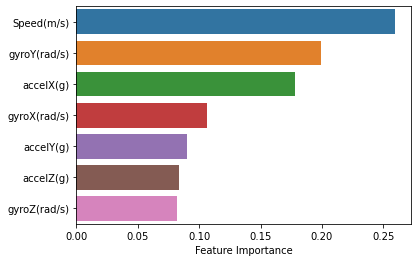

In [43]:
temp = pd.DataFrame(RF.feature_importances_)
temp[1] = x_train.columns
temp = temp.sort_values(0,ascending=False)
sns.barplot(temp[0],temp[1])
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.show()

In [44]:
temp = pd.DataFrame(RF2.feature_importances_)
temp[1] = x_test.columns
temp = temp.sort_values(0,ascending=False)
sns.barplot(temp[0],temp[1])
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.show()

NameError: name 'RF2' is not defined

In [42]:
temp = pd.DataFrame(RF2.feature_importances_)
temp[1] = x_train.columns
temp = temp.sort_values(0,ascending=False)
sns.barplot(temp[0],temp[1])
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.show()

NameError: name 'RF2' is not defined